In [30]:
%load_ext autoreload
%autoreload 2

from utils import gradient_descent as gd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Gradient Descent

We are dedicating a notebook for gradient descent because there are some techniques and tricks that we can apply to gradient descent to speed up and stabalize the training process. We will also take a look at the different tradeoffs in various techniques.

Before we dive into the different types or techniques, we should have a refresher on the formulation or what gradient descent is trying to do here in machine learning. So typically when you train a model, you want the model to learn something from the data. You achieve this "learning" via updating the parameters of the model. This "updating" process of figuring out **what to update** and **how to update** is equivalent to solving an optimization problem. There are lots of different optimization techniques to solve this optimization/math problem, such as finding an analytical solution to the problem/objective function, another way is to perform the gradient descent optimization. 

In the below formula, you can see we're trying to find a minimum value of the error/objective function in that weight space using the technique called gradient descent. The weights that minimizes this error/objective function is then considered to be a solution to that learning problem. Below is a generic loss function:

$$
\mathcal{L}(\mathbf{\theta}) = \frac{1}{N}\sum_{i=1}^{N} \ell\Big(y_i, f\big(\mathbf{x}_i; \mathbf{\theta}\big)\Big)
$$

Where 
- $\theta$: The vector of weights (model parameters).
- $L(\theta)$: The overall loss function computed over all samples.
- $N$: The total number of samples in the dataset.
- $i$: The index for each sample (ranging from 1 to N).
- $\ell$: The loss function for an individual sample (e.g., mean squared error, cross-entropy).
- $y_i$: The true target value for the i-th sample.
- $f(x_i; \theta)$: The model's prediction for the i-th sample given the input features and weights.
- $x_i$: The input features for the i-th sample.

From calculus we know that in order to find a maximum or minimum, we want to take the first-order derivative of the function with respect to the inputs. In this case, we're taking the derivative of the loss function $L$ with respect to the input weights $\theta$, namely $\frac{\partial L}{\partial \theta}$. Then we use this information $\frac{\partial L}{\partial \theta}$ to update the weights of the model $\theta$

$$
\theta^{(t+1)} = \theta^{(t)} - \eta \, \frac{\partial L}{\partial \theta}
$$
Where
- $t$ is the current training iteration, and $t+1$ is the next training iteration

Okay, so now we know what gradient descent is all about. Let's move on to the various techniques and categories of gradient descent and their trade-offs.

### (Full) Batch Gradient Descent

Full Batch Gradient Descent computes the gradient of the loss function using the *entire* dataset for every single update. In other words, if you have $N$ data points, you consider all $N$ points to evaluate. Sometimes the term **Batch Gradient Descent** is used interchangeably with **Full Batch Gradient Descent**.

$$
\mathcal{L}(\mathbf{\theta}) = \frac{1}{N}\sum_{i=1}^{N} \ell\Big(y_i, f\big(\mathbf{x}_i; \mathbf{\theta}\big)\Big)
$$
Then you update the parameters:
$$
\theta^{(t+1)} = \theta^{(t)} - \eta \, \frac{\partial L}{\partial \theta}
$$

**Pros**  
- **Stable Convergence:** Since you use all data points, your gradient estimate is very accurate and has low variance. This can lead to more stable convergence.  
- **Theoretical Guarantees:** Many theoretical derivations for convergence rates assume full-batch methods, making analysis more straightforward in some cases.

**Cons**  
- **Computationally Expensive:** You must process the entire dataset before making a single update. This can be prohibitively slow for large datasets.  
- **Memory Intensive:** Handling the entire dataset (especially large ones) in memory for each update can be challenging.

**Typical Use Cases**  
- Small or moderate datasets where loading the full dataset and computing the gradient is feasible.  
- Certain scenarios in research or theoretical work where stable, exact gradients are preferred over approximate ones.


### Stochastic Gradient Descent

Stochastic Gradient Descent (SGD) updates parameters using the gradient calculated from a *single* randomly chosen data point (or a mini-batch size of 1). Mathematically, for a single example $(x_i, y_i)$, the update is:
$$
\theta^{(t+1)} = \theta^{(t)} - \eta \, \nabla_\theta \ell\Big(y_i, f\big(\mathbf{x}_i; \theta^{(t)}\big)\Big)
$$

Where
$$
\nabla_\theta \ell\Big(y_i, f\big(\mathbf{x}_i; \theta^{(t)}\big)\Big) = \frac{\partial L}{\partial \theta}
$$
in the previous full batch gradient descent formula but only considering one $x_i, y_i$

**Pros**  
- **Fast Iterations:** Because you only use one sample for the gradient estimate, each update is very quick.  
- **Better at Escaping Local Minima:** The noisy gradient can sometimes help avoid shallow local minima and saddle points, potentially leading to better solutions.

**Cons**  
- **High Variance in Updates:** Using only one data point to estimate the gradient can make the updates extremely noisy. This can slow or destabilize convergence if not handled properly (e.g., by decreasing the learning rate over time).  
- **Need for More Tuning:** Because of the variance, tuning the learning rate schedule is crucial. An improperly tuned schedule may cause divergence or slow convergence.

**Typical Use Cases**  
- Very large datasets where even moderate batch sizes are difficult to handle in memory.  
- Online learning scenarios where new data arrives in a stream, and you want to update the model continuously.

Oftentimes we would combine this stochastic nature with other gradient descent methods such as SGD + Mini-Batch. And therefore we would not run a training session with a batch size equal to 1. So the above optimization step is only for illustration purposes.

### Mini- Batch Gradient Descent

In **Mini-Batch Gradient Descent**, you split the dataset into small batches (e.g., 16, 32, 64, 128 samples at a time). For each batch $\mathcal{B}$ of size $b$, you compute:
$$
\nabla_\theta L_\mathcal{B}(\theta) = \frac{1}{b} \sum_{i \in \mathcal{B}} \nabla_\theta \ell\big(y_i, f(x_i; \theta)\big),
$$
and update:
$$
\theta^{(t+1)} = \theta^{(t)} - \eta \,\nabla_\theta L_\mathcal{B}(\theta^{(t)}).
$$

**Pros**  
- **Balance Between Speed and Stability:** A small batch size provides faster updates than full-batch while reducing the variance in the gradient compared to pure stochastic (single-sample) updates.  
- **Efficient Use of Vectorized Operations:** Modern hardware (GPUs, TPUs) can efficiently process a chunk of data in parallel, often making mini-batch updates faster in practice than purely one-sample SGD.  
- **Less Memory-Intensive Than Full Batch:** You only need to load a small portion of the data to compute each gradient, which is often more manageable for large datasets.

**Cons**  
- **Still Some Variance:** The gradient is an estimate based on a subset, so there is some noise in the updates (though less than pure SGD).  
- **Need to Tune Batch Size:** Too large a batch might degrade the speed of updates; too small a batch might lead to unstable gradient estimates. The optimal batch size can be problem-dependent.

**Typical Use Cases**  
- Almost all practical deep learning tasks today, where datasets are large and efficient parallel computations matter.  
- When you want to strike a good balance between convergence speed and stable training.


#### Visualization

We can see below that each of the method has a different schedule of computing the gradient or updating weights/parameters of the model.

Full-Batch (1st subplot):
- All 12 samples are processed (green triangle at sample 12 indicates gradient computed across the entire dataset), then one red circle at sample 12 indicates the update.

Mini-Batch (2nd subplot):
- Every 4 samples (batch_size=4), we see a green triangle (Grad@4, 8, 12) and immediately a red circle (Update@4, 8, 12) at the same points.

Stochastic (3rd subplot):
- A green triangle for each sample from 1..12, plus a red circle on each sample as well—since for batch size=1, each data point triggers a gradient compute and an update.

Gradient Accumulation (bottom subplot):
- A green triangle each time we finish a mini-batch of size 3 (Grad@3, 6, 9, 12).
- However, we only see updates at 6 and 12, reflecting that we “accumulate” two mini-batches (at 3 and 6, or at 9 and 12) before we apply a weight update.

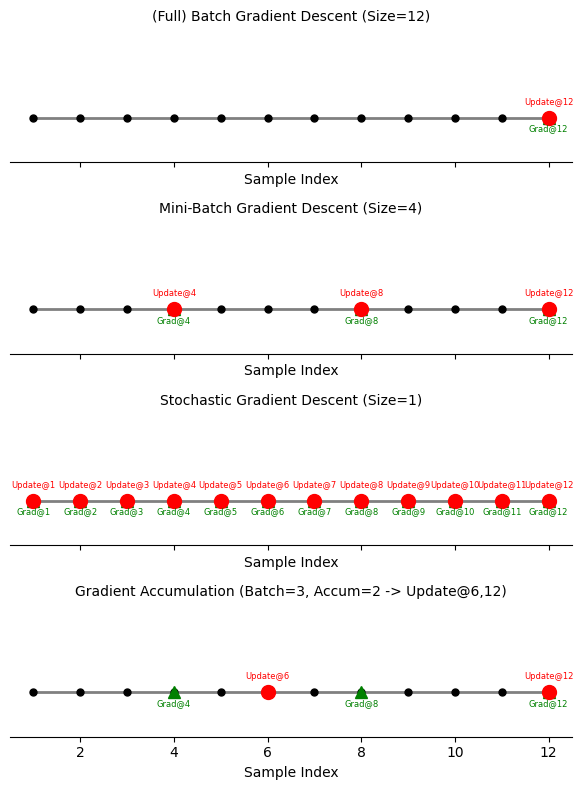

In [31]:
gd.compare_gradient_weight_update_schedule()

Let's take a look at the plot below.

On the left plot:

1.	Full-Batch (blue line) starts at a small value near 0. Each update is computed from the entire dataset, so it makes bigger but fewer, smoother steps. You can see it steadily climb toward 3.0 without much oscillation.
2.	Mini-Batch (orange line) does more frequent updates on subsets (batches) of the data, so it jumps around a bit more but still heads toward 3.0.
3.	Accum (green line) also uses batches, but it accumulates gradients from multiple mini-batches before applying each update. This can lead to frequent little wiggles (since each mini-batch is smaller), but overall it hugs the area around 3.0 fairly quickly.

By the end of training (right side of the plot), all methods are converging close to the true parameter value at 3.0, but they differ in how fast and how smoothly they get there.

On the right plot:

1.	Full-Batch (blue) has relatively few updates, but each one drops the loss significantly and smoothly since it uses the entire dataset each time. You can see the blue line decreasing in a more “continuous” fashion.
2.	Mini-Batch (orange) updates more often, using smaller chunks of the data. Its loss line bounces slightly because each gradient is based on a portion of the data, but overall it trends downward toward a very small loss.
3.	Accum (green) is a bit noisier because each update relies on even smaller partial gradients before they’re accumulated, so you see more fluctuations. However, it still settles around a very low loss in the long run.

Even though the green line is more erratic, notice it ends up with similarly low loss values, showing it also converges well—just with more up-and-down along the way. In general, if you have enough memory in your training machine, you should use a larger batch size, otherwise you could use the accumulation method to simulate larger batch sizes. And it would result in very similar performance, but a little more variance compared to the batch size of 16 that we're trying to simulate from the gradient accumulation (4 steps x batch size of 4 = 16)

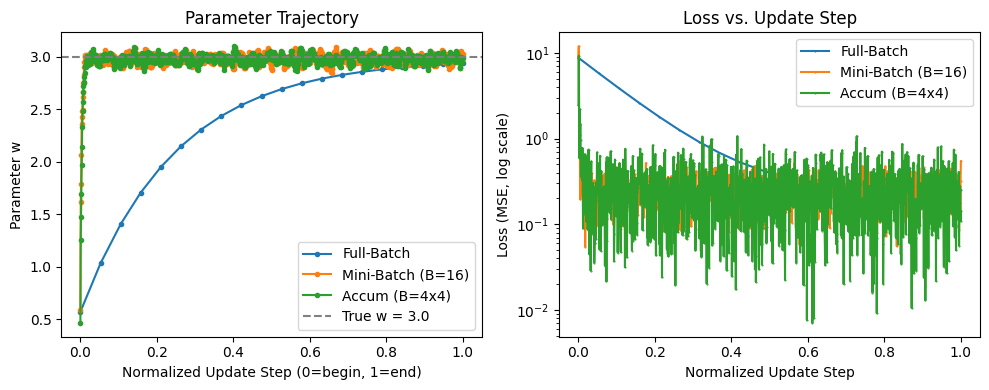

In [32]:
gd.compare_loss_parameter_trajectory()